## Topic Modeling on Texts using Latent Semantic Analysis  
*Document-Term Matrix, TF-IDF, SVD, and K-means*


## Part 1 - Load and preprocess the data 

In [2]:
import pandas as pd 
data = pd.read_csv("russian_tweets.csv")
data['date'] = pd.to_datetime(data.date)
# create a new column that saves date only 
data['datetime'] = data['date'].dt.date
data

,user_name,date,text,tweet_id,datetime
0,kathiemrr,2017-02-27 14:54:00,thingsdonebymistake kissing auntie in the lips,8.362279e+17,2017-02-27
1,traceyhappymom,2016-08-15 14:50:20,theolderweget the more pessimistic we are,7.651989e+17,2016-08-15
2,evewebster373,2015-06-30 21:56:09,ready to feel like a failure joan of arc was o...,6.160023e+17,2015-06-30
3,blacktolive,2016-09-16 08:04:48,amen blacklivesmatter,7.766933e+17,2016-09-16
4,jacquelinisbest,2016-09-18 19:46:25,twitchy chuck todd caught out there shilling f...,7.775946e+17,2016-09-18
...,...,...,...,...,...
203446,cookncooks,2016-12-03 03:16:17,6 rexnord bearings is set to close its plant i...,8.048869e+17,2016-12-03
203447,newspeakdaily,2016-09-30 23:39:11,will trump’s bad week hurt the gop’s senate pr...,7.820019e+17,2016-09-30
203448,specialaffair,2016-09-05 10:45:09,china blames united states journalists for oba...,7.727474e+17,2016-09-05
203449,patriotblake,2017-02-06 12:36:14,💥💥 presidentelecttrump absolutely must watch t...,8.285831e+17,2017-02-06


In [3]:
# check data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203451 entries, 0 to 203450
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_name  203451 non-null  object        
 1   date       203430 non-null  datetime64[ns]
 2   text       201109 non-null  object        
 3   tweet_id   201137 non-null  float64       
 4   datetime   203430 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 7.8+ MB


In [4]:
# drop NA rows
df = data.dropna()
df.shape

(198801, 5)

## Part 2 - Exploratory Data Analysis (EDA) 


In [5]:
# group the tweets by each user
group_tweets = df.groupby(['user_name']).size()

# convert series to data frame
group_tweets = pd.Series.to_frame(group_tweets)
group_tweets = group_tweets.rename(columns = {0: 'num_tweets'})

# sort the number of tweets in descending order 
group_tweets_sorted = group_tweets.sort_values(by= 'num_tweets', ascending = False)
group_tweets_sorted

,num_tweets
user_name,
ameliebaldwin,9147
hyddrox,6650
giselleevns,6591
patriotblake,4038
thefoundingson,3559
...,...
horrorki,1
tinatkurtz1222,1
milimillennium,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 
k = 20
top_20users = group_tweets_sorted.iloc[0:k,:]

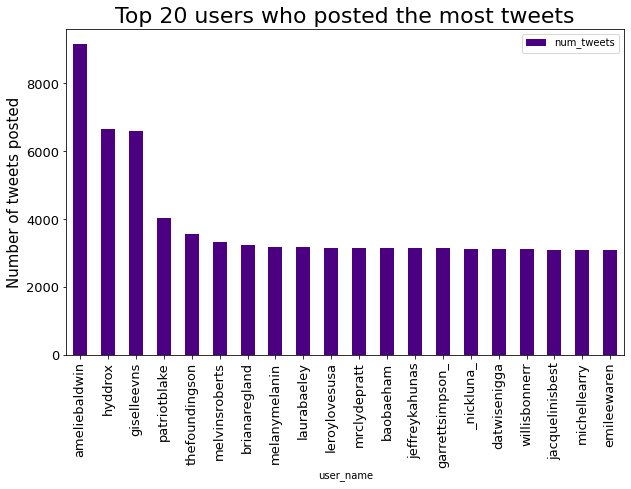

In [7]:
# Plot top 20 users
ax = top_20users.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13)
ax.set_alpha(1)
ax.set_title("Top 20 users who posted the most tweets", fontsize=22)
ax.set_ylabel("Number of tweets posted", fontsize=15)
plt.show()

#### Part B - Time Series Plot


In [8]:
# group tweets by date posted 
group_tweets_by_date = df.groupby(['datetime']).size()

# convert series to data frame
group_tweets_by_date = pd.Series.to_frame(group_tweets_by_date)
group_tweets_by_date = group_tweets_by_date .rename(columns = {0: 'Total tweets posted on a day'})

# sort the date in descending order
group_tweets_by_date_sorted = group_tweets_by_date.sort_values(by= 'datetime', ascending = False)
group_tweets_by_date_sorted

,Total tweets posted on a day
datetime,
2017-09-26,3
2017-09-24,1
2017-09-19,1
2017-09-16,6
2017-09-10,7
...,...
2014-07-23,1
2014-07-22,3
2014-07-20,2


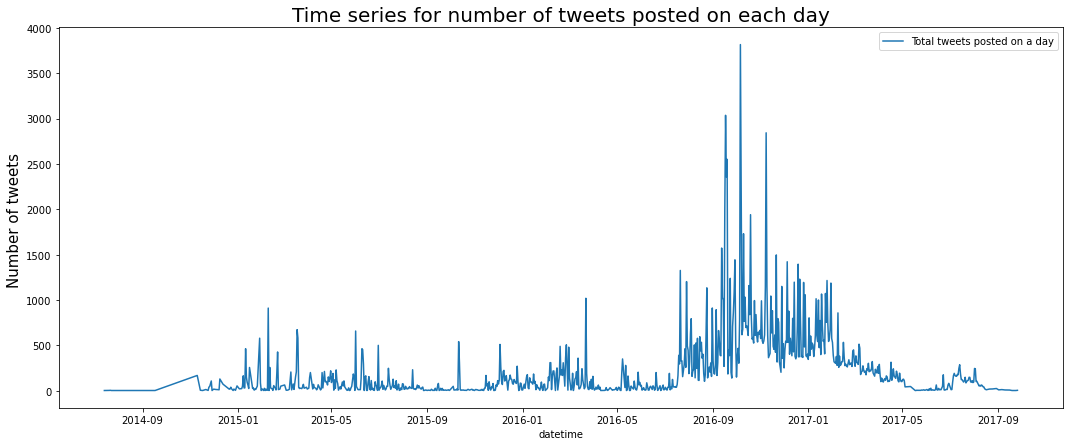

In [9]:
ts = group_tweets_by_date.plot(figsize=(18,7))
ts.set_title("Time series for number of tweets posted on each day", fontsize= 20)
ts.set_ylabel("Number of tweets ", fontsize=15)
plt.show()

#### Part C - Word Frequencies


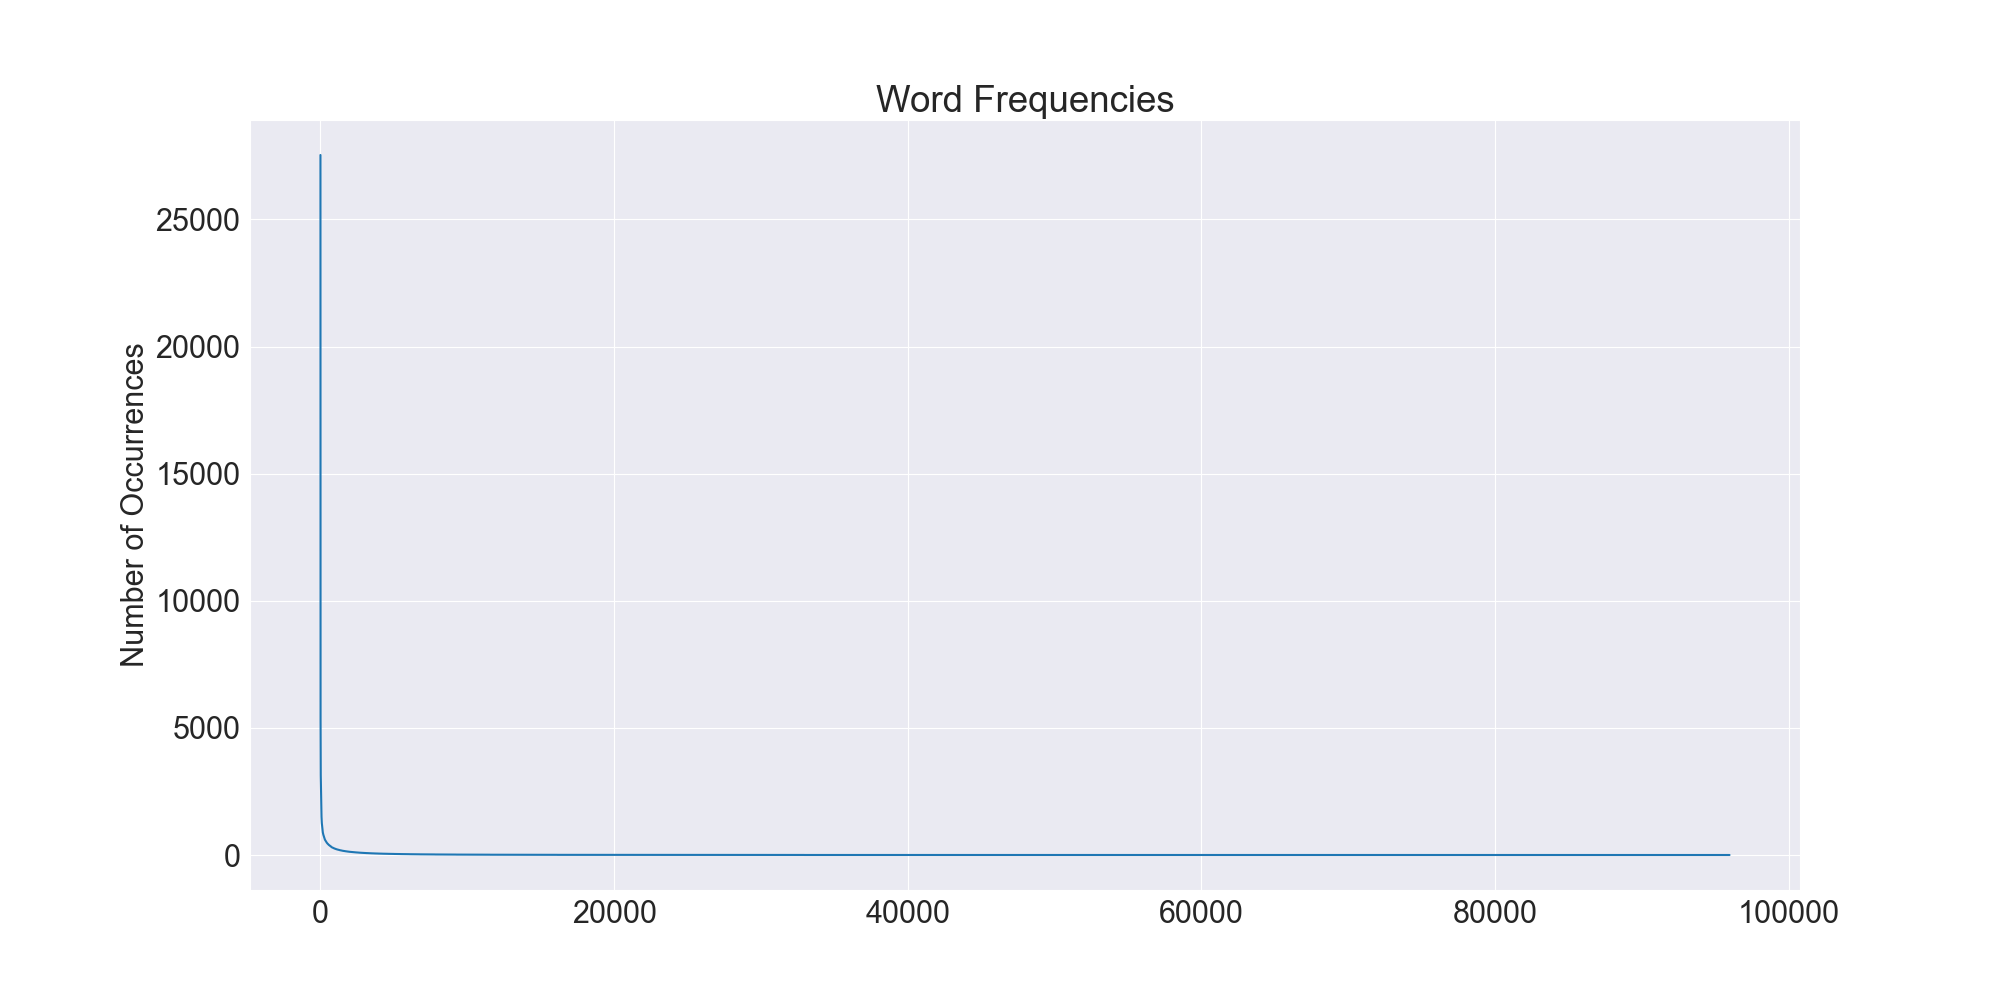

## Part 3 - Document-Term and TF-IDF Matrices (25 points)


#### Part A  - Document-Term Matrix

1. Initialize the appropriate scikit-learn model that will generate a Document-Term matrix from a set of texts.
2. Fit the model to our data and transform our raw texts into a Document-Term matrix.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
countvec = CountVectorizer( stop_words = 'english', max_features = 10000)
doc_term = countvec.fit_transform(df['text'])
doc_term

<198801x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 1193154 stored elements in Compressed Sparse Row format>

**Print the shape of our resulting matrix**

How many documents and how many words does our Document-Term matrix include?

In [18]:
doc_term.shape

(198801, 10000)

#####  There are 198801 documents and each has 10000 words

#### Part B - TF-IDF Matrix

1. Initialize the appropriate scikit-learn model that will generate a TF-IDF matrix from a set of texts.
2. Fit the model to our data and transform our raw texts into a TF-IDF matrix.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', max_features = 10000)
tf_idf = vectorizer.fit_transform(df['text'])

In [20]:
tf_idf.shape

(198801, 10000)

## Part 4 - Dimensionality Reduction (25 points)

#### Part A - Perform dimensionality reduction on our document matrices


In [33]:
from sklearn.decomposition import TruncatedSVD
svd_doc_term = TruncatedSVD(n_components=100)

In [34]:
doc_term_reduction = svd_doc_term.fit_transform(doc_term)

In [35]:
doc_term_reduction.shape

(198801, 100)

1. Initialize the appropriate scikit-learn model that will apply SVD dimensionality reduction on a matrix.
2. Fit the model to our TF-IDF matrix, and transform our matrix to one with reduced dimensions.

In [36]:
svd_tf_idf = TruncatedSVD(n_components=100)

In [37]:
tf_idf_reduction = svd_tf_idf.fit_transform(tf_idf)

In [38]:
tf_idf_reduction.shape

(198801, 100)

#### Part B - Data normalization

After applying SVD, re-normalize our data so clusters will be more "spherical" (better for k-means)

Use the Normalizer class provided in the *sklearn.preprocessing* package to normalize both our reduced Document-Term and TF-IDF matrices.

1. Initialize the appropriate scikit-learn model.
2. Fit the model to our reduced Document-Term matrix, and transform our matrix to a normalized one.

In [39]:
from sklearn.preprocessing import Normalizer
# normalize Document-Term matrix
doc_term_normalize = Normalizer()
scaled_doc_term = doc_term_normalize.fit_transform(doc_term_reduction)

In [40]:
scaled_doc_term.shape

(198801, 100)

1. Initialize the appropriate scikit-learn model.
2. Fit the model to our reduced TF-IDF matrix, and transform our matrix to a normalized one.

In [41]:
# normalize TF-IDF matrix
tf_idf_normalize = Normalizer()
scaled_tf_idf = tf_idf_normalize.fit_transform(tf_idf_reduction)

In [42]:
scaled_tf_idf.shape

(198801, 100)

## Part 5 - Topic Modeling (30 points)

- Cluster our document matrices using the k-means algorithm.
- Analyze the top terms associated with each cluster. Try to determine a general topic to describe each cluster.
- Compare the performance of Document-Term and TF-IDF matrices. Which performed better in your opinion?

#### Part A - Determine the best k value

1. Initialize the appropriate scikit-learn model.
2. Fit the clustering model to our reduced and normalized Document-Term matrix.
3. Run the clustering experiment for a number of k-values.
4. Plot the sum of squared distances of samples to their closest cluster center. *Refer to sklearn documentation to find this value (You do not have to do any computation)*.
5. Choose the best k value. What value did you choose?

In [43]:
from sklearn.cluster import KMeans
km = KMeans(
    n_clusters= 5,
    init='k-means++',
    n_init=5,
    random_state=2021
)
km.fit(scaled_doc_term)

KMeans(n_clusters=5, n_init=5, random_state=2021)

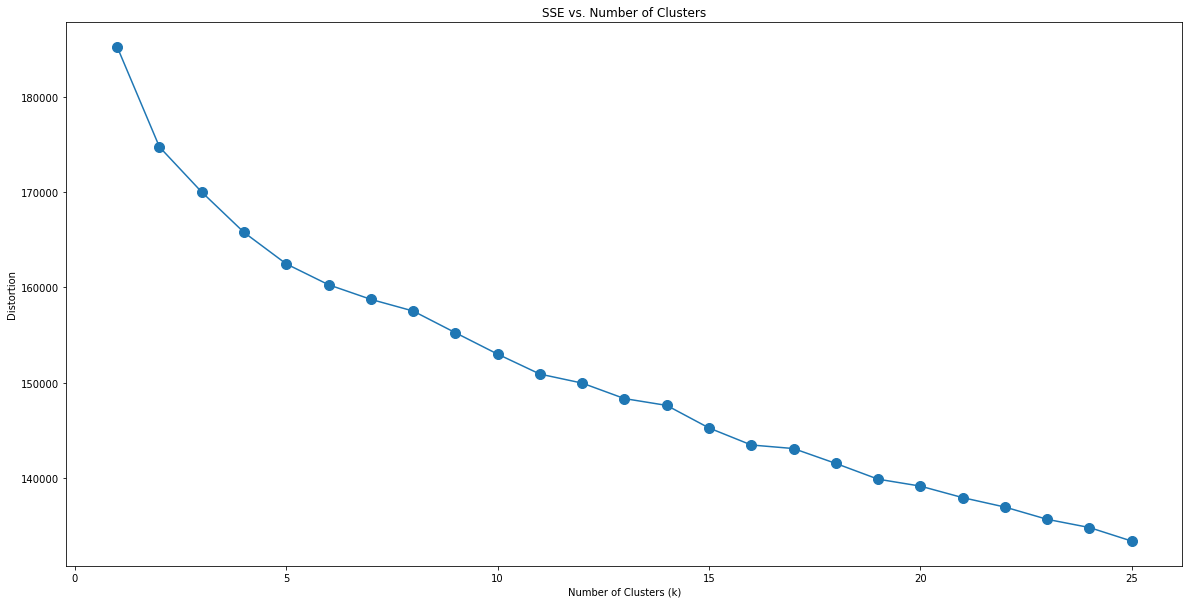

In [32]:
errors = []
k_range = range(1, 26)
for i in k_range:
    km = KMeans(
        n_clusters=i,
        init='random',
        random_state=0
    )
    km.fit(scaled_doc_term)
    errors.append(km.inertia_)
plt.figure(figsize=(20, 10))
plt.plot(k_range, errors, marker='o', markersize=10)
plt.title('SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

#####  After k = 20, SSE seems to go down slowly and converges. So, k = 20 is an optimal choice to cluster  both of the 2 matrices.

#### Part B  - Cluster Document-Term and TF-IDF Matrices

Run k-means clustering on our reduced and normalized Document-Term matrix using the k-value you selected in Part A.

In [44]:
doc_term_km = KMeans(
    n_clusters = 20,
    init='k-means++',
    random_state = 100
)
doc_term_kmean = doc_term_km.fit(scaled_doc_term)

In [45]:
doc_term_kmean

KMeans(n_clusters=20, random_state=100)

Run k-means clustering on our reduced and normalized TF-IDF matrix using the k-value you selected in Part A.

In [46]:
tf_idf_km = KMeans(
    n_clusters = 20,
    init='k-means++',
    random_state= 100
)
tf_idf_kmean = tf_idf_km.fit(scaled_tf_idf)

In [47]:
tf_idf_kmean

KMeans(n_clusters=20, random_state=100)

#### Part C - Cluster analysis and topic modeling

The function below will print out the top words associated with each cluster.

You need to provide the fitted scikit-learn **Vectorizer** model, **SVD** model, and **KMeans** model as arguments to this function.

*Note: The cluster numbers will not line up between the different result sets (i.e. Cluster 1 from Doc-Term will not be the same as Cluster 1 from TF-IDF)*.

In [48]:
def get_top_terms_per_cluster(vectorizer, svd, kmeans, n_terms=20):
    original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
    cluster_word_indices = original_space_centroids.argsort()[:, :-(n_terms+1):-1]
    
    terms = vectorizer.get_feature_names()
    
    print('Top terms per cluster:')
    for cluster_num, word_indices in enumerate(cluster_word_indices):
        print(f'Cluster {cluster_num}:')
        for i in word_indices:
            print(f'\t{terms[i]}')
        print()

Print the top terms associated with each cluster generated from the Document-Term matrix.

In [49]:
get_top_terms_per_cluster(countvec, svd_doc_term, doc_term_km)

Top terms per cluster:
Cluster 0:
	love
	time
	day
	make
	america
	know
	black
	want
	life
	need
	think
	god
	great
	youre
	stop
	say
	maga
	thats
	did
	trumpforpresident

Cluster 1:
	best
	free
	big
	come
	live
	today
	man
	world
	truth
	video
	war
	watch
	things
	cruz
	lets
	htt
	ht
	russia
	does
	thank

Cluster 2:
	right
	trump
	left
	just
	thing
	people
	obama
	wrong
	2a
	know
	doing
	youre
	hillary
	im
	like
	thats
	need
	time
	think
	free

Cluster 3:
	police
	woman
	muslim
	national
	htt
	breaking
	war
	obamas
	security
	law
	state
	speech
	family
	russia
	free
	neverhillary
	americans
	years
	million
	fbi

Cluster 4:
	hillary
	clinton
	trump
	campaign
	clintons
	politics
	donald
	emails
	president
	vote
	says
	video
	fbi
	debate
	neverhillary
	email
	wikileaks
	media
	watch
	benghazi

Cluster 5:
	dont
	know
	people
	want
	like
	trump
	just
	care
	think
	need
	let
	believe
	understand
	vote
	reply
	make
	im
	forget
	say
	hillary

Cluster 6:
	trumps
	election
	white
	gop
	dnc
	vot

Print the top terms associated with each cluster generated from the TF-IDF matrix.

In [50]:
get_top_terms_per_cluster(vectorizer, svd_tf_idf, tf_idf_km)

Top terms per cluster:
Cluster 0:
	tcot
	pjnet
	ccot
	wakeupamerica
	2a
	teaparty
	cruzcrew
	p2
	nra
	gop
	tgdn
	tlot
	rednationrising
	cruz
	renewus
	trump
	lnyhbt
	cosproject
	uniteblue
	gun

Cluster 1:
	police
	state
	betteralternativetodebates
	breaking
	family
	help
	playing
	work
	fbi
	free
	night
	twitter
	emails
	christmasaftermath
	game
	year
	post
	join
	gop
	alternativeacronyminterpretations

Cluster 2:
	time
	love
	good
	make
	america
	know
	trumps
	life
	want
	need
	right
	election
	best
	think
	god
	live
	great
	youre
	stop
	country

Cluster 3:
	year
	women
	world
	todolistbeforechristmas
	muslim
	alternativeacronyminterpretations
	christmas
	police
	war
	woman
	check
	hes
	men
	refugees
	usa
	old
	family
	muslims
	islam
	real

Cluster 4:
	people
	trump
	american
	black
	white
	hillary
	think
	work
	obama
	stop
	police
	kill
	want
	need
	vote
	know
	hate
	make
	tell
	say

Cluster 5:
	merkelmussbleiben
	die
	merkel
	der
	ist
	und
	sie
	für
	hat
	das
	frau
	von
	deutschland